In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [9]:
stats_df = pd.read_csv("hpc/model_1/statsdf.csv")
i_cb_dict = {key:value for key, value in zip(stats_df['i'].to_list(), stats_df['cb'].to_list())}
cb_vals = list(i_cb_dict.values())

In [76]:
def stat_change(result_g, result_t):
    # if all 4 statistical tests in both the gillespie and tau leaping simulation results agree the value increases 
    if   result_g[1] == 'greater' and result_g[3] == 'greater' and result_g[5] == 'increasing' and result_g[7] == 'non-stationary':
        if result_t[1] == 'greater' and result_t[3] == 'greater' and result_t[5] == 'increasing' and result_t[7] == 'non-stationary':
            return '++'
    
    # if all 4 statistical tests in both the gillespie and tau leaping simulation results agree the value decreases
    if result_g[1] == 'less' and result_g[3] == 'less' and result_g[5] == 'decreasing' and result_g[7] == 'non-stationary':
        if result_t[1] == 'less' and result_t[3] == 'less' and result_t[5] == 'decreasing' and result_t[7] == 'non-stationary':
            return '--'
    
    # otherwise no change occured
    return '  '
    
for i in np.arange(0, len(stats_df), step=2):
    # load statistics results for gillespie and tauleaping simulations
    result_g = stats_df.iloc[i  ].tolist()
    result_t = stats_df.iloc[i+1].tolist()
    
    # get results for copy number, effective population size, and heteroplasmy
    cn_result_g  = result_g[0:8];   cn_result_t = result_t[0:8]
    eps_result_g = result_g[8:16];  eps_result_t = result_t[8:16]
    het_result_g = result_g[16:24]; het_result_t = result_t[16:24]
    
    print(
        'cn change:', stat_change(cn_result_g, cn_result_t), 
        '\teps change:', stat_change(eps_result_g, eps_result_t),
        '\thet change:', stat_change(het_result_g, het_result_t), 
        '\t\tcb=',result_t[26])

cn change: ++ 	eps change:    	het change: ++ 		cb= 0.1
cn change: ++ 	eps change:    	het change: ++ 		cb= 0.09
cn change: ++ 	eps change:    	het change: ++ 		cb= 0.08
cn change: ++ 	eps change:    	het change: ++ 		cb= 0.07
cn change: ++ 	eps change:    	het change: ++ 		cb= 0.06
cn change: ++ 	eps change:    	het change: ++ 		cb= 0.05
cn change: ++ 	eps change:    	het change: ++ 		cb= 0.04
cn change: ++ 	eps change:    	het change: ++ 		cb= 0.03
cn change: ++ 	eps change:    	het change: ++ 		cb= 0.02
cn change: ++ 	eps change:    	het change: ++ 		cb= 0.01
cn change: ++ 	eps change:    	het change: ++ 		cb= 0.01
cn change: ++ 	eps change:    	het change: ++ 		cb= 0.009
cn change: ++ 	eps change:    	het change: ++ 		cb= 0.008
cn change: ++ 	eps change:    	het change: ++ 		cb= 0.007
cn change: ++ 	eps change:    	het change: ++ 		cb= 0.006
cn change: ++ 	eps change:    	het change: ++ 		cb= 0.005
cn change: ++ 	eps change:    	het change: ++ 		cb= 0.004
cn change: ++ 	eps change:

In [84]:
ps_mean = []
ps_sem = []
eps_mean = []
eps_sem = []
het_mean = []
het_sem = []

for i in i_cb_dict:
    df = pd.read_csv(f"hpc/model_1/paramdf_{i}_gillespie.csv")
    #df = pd.read_csv(f"hpc/model_1/paramdf_{i}_tauleaping.csv")
    final_vals = df.iloc[-1].to_dict()
    
    ps_mean.append(final_vals['ps_mean'])
    ps_sem.append(final_vals['ps_sem'])
    eps_mean.append(final_vals['eps_mean'])
    eps_sem.append(final_vals['eps_sem'])
    het_mean.append(final_vals['het_mean'])
    het_sem.append(final_vals['het_sem'])
    
ps_mean = np.array(ps_mean)
ps_sem = np.array(ps_sem)
eps_mean = np.array(eps_mean)
eps_sem = np.array(eps_sem)
het_mean = np.array(het_mean)
het_sem = np.array(het_sem)

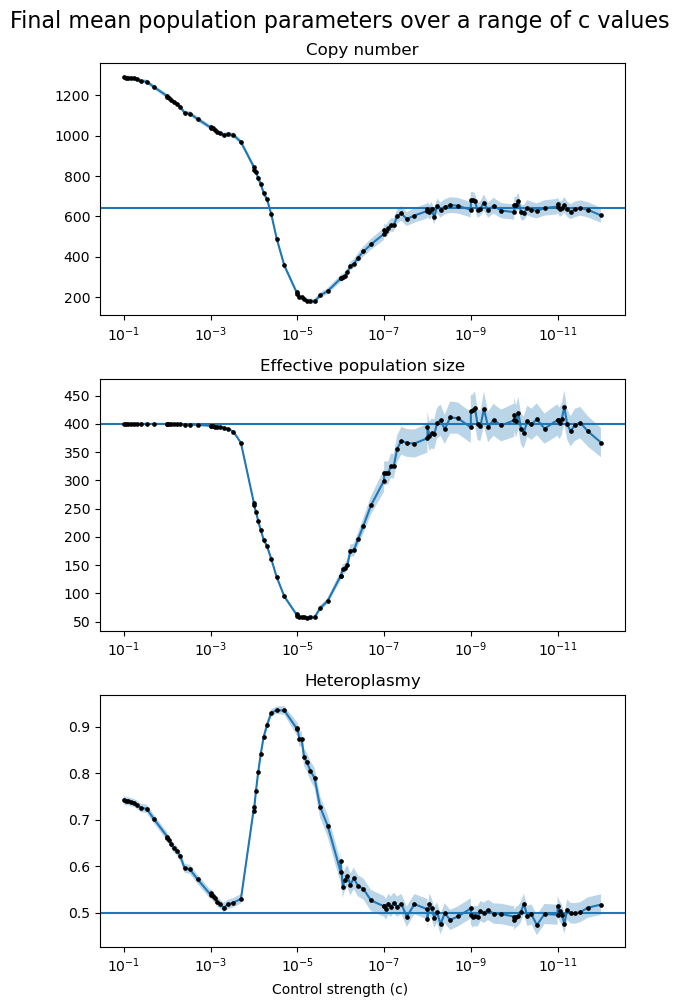

In [115]:
fig, axs = plt.subplots(3, 1, figsize=(6, 10))

axs[0].fill_between(cb_vals, ps_mean-(2*ps_sem), ps_mean+(2*ps_sem), alpha = 0.3, zorder=1)
axs[0].plot(cb_vals, ps_mean, zorder=2)
axs[0].scatter(cb_vals, ps_mean, s = 5.5, color = 'k', zorder=3)
axs[0].axhline(640)
axs[0].invert_xaxis()
axs[0].set_xscale("log")
axs[0].set_title("Copy number")

axs[1].fill_between(cb_vals, eps_mean-(2*eps_sem), eps_mean+(2*eps_sem), alpha = 0.3, zorder=1)
axs[1].plot(cb_vals, eps_mean, zorder=2)
axs[1].scatter(cb_vals, eps_mean, s = 5.5, color = 'k', zorder=3)
axs[1].axhline(400)
axs[1].invert_xaxis()
axs[1].set_xscale("log")
axs[1].set_title("Effective population size")


axs[2].fill_between(cb_vals, het_mean-(2*het_sem), het_mean+(2*het_sem), alpha = 0.3, zorder = 1)
axs[2].plot(cb_vals, het_mean, zorder=2)
axs[2].scatter(cb_vals, het_mean, s = 5.5, color = 'k', zorder=3)
axs[2].axhline(0.5)
axs[2].invert_xaxis()
axs[2].set_xscale("log")
axs[2].set_title("Heteroplasmy")

fig.suptitle('Final mean population parameters over a range of c values', size = 16)
fig.text(0.5, 0.00, 'Control strength (c)', ha='center', va='center')
plt.tight_layout()
plt.show()